In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster import hierarchy

In [5]:
data=pd.read_csv("wine.csv")
data.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


# MANUAL PCA

Feature Scaling:Standardization for PCA

In [20]:
stdalgo=StandardScaler()
stddata=stdalgo.fit_transform(data)
stddf=pd.DataFrame(stddata)
cov=stddf.cov()
values,vectors=np.linalg.eig(cov)
values



array([5.56722458, 2.51118402, 1.45424413, 0.9331603 , 0.88246016,
       0.67657935, 0.55692777, 0.05813894, 0.13029618, 0.35201176,
       0.16975037, 0.29620602, 0.26378805, 0.2271244 ])

In [22]:
pc0=stddf@vectors[:,0]
pc1=stddf@vectors[:,1]
pc2=stddf@vectors[:,2]
pc3=stddf@vectors[:,3]
pc4=stddf@vectors[:,4]
pc5=stddf@vectors[:,5]
pc6=stddf@vectors[:,6]
pc7=stddf@vectors[:,10]
pc8=stddf@vectors[:,12]
pc9=stddf@vectors[:,13]
pc10=stddf@vectors[:,11]
pc11=stddf@vectors[:,8]

# PCA USing SKLEARN

In [24]:
PCAalgo=PCA()
PCAalgo.fit_transform(stddf)
PCAalgo.explained_variance_ratio_

array([0.39542486, 0.17836259, 0.10329102, 0.06627984, 0.06267875,
       0.0480556 , 0.03955707, 0.02500244, 0.02103871, 0.01873615,
       0.01613203, 0.01205691, 0.00925458, 0.00412945])

In [25]:
np.cumsum(PCAalgo.explained_variance_ratio_)

array([0.39542486, 0.57378745, 0.67707846, 0.74335831, 0.80603706,
       0.85409266, 0.89364973, 0.91865217, 0.93969088, 0.95842703,
       0.97455906, 0.98661596, 0.99587055, 1.        ])

# SCREE Plot 

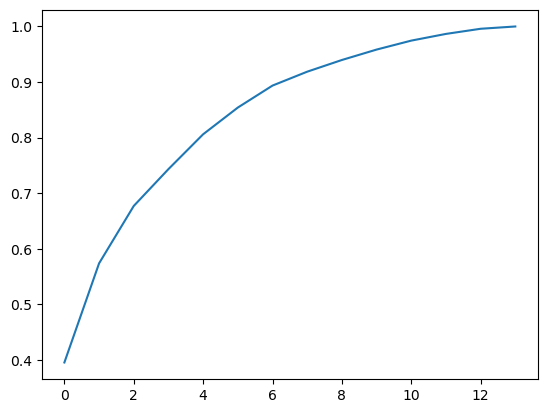

In [26]:
plt.plot(np.cumsum(PCAalgo.explained_variance_ratio_))

# Elbow Plot

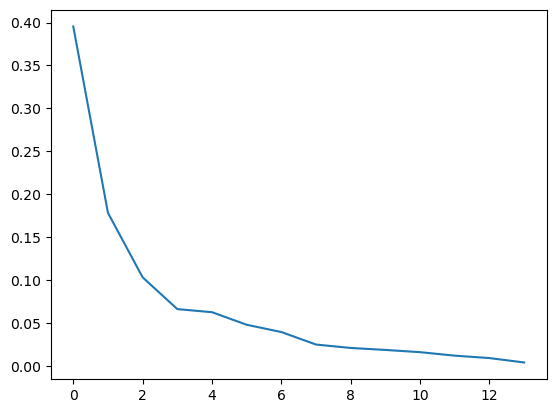

In [27]:
plt.plot(PCAalgo.explained_variance_ratio_)

In [50]:
# PCA for 5 components
PCAalgo=PCA(n_components=5)
pcadf=pd.DataFrame(PCAalgo.fit_transform(stddf))

PCAalgo.explained_variance_
np.cumsum(PCAalgo.explained_variance_ratio_)

array([0.39542486, 0.57378745, 0.67707846, 0.74335831, 0.80603706])

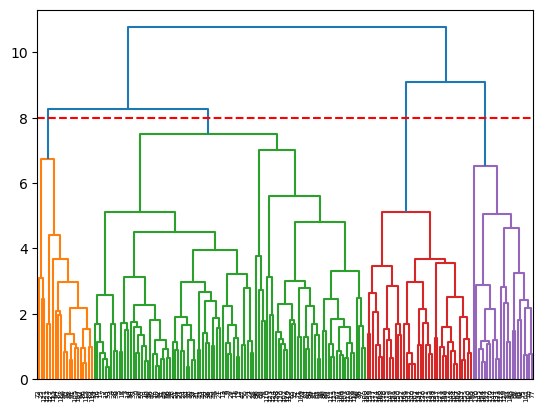

In [51]:
from scipy.cluster import hierarchy

lk = hierarchy.linkage(pcadf,method='complete')
dendrogram = hierarchy.dendrogram(lk)
plt.axhline(y = 8 , c = 'red', linestyle = '--')

# Doubt: when I am passing all the PCA values then the dendogram is same as the hierarchial clustering 
if I reduce the features wrt PCA then the number of clusters are decreasing
*only difference I can see is the cut is at 8 and the number of clusters are changed so what is the significance of this.

In [47]:
# PCA for 14 components
PCAalgo=PCA(n_components=14)
pcadf=pd.DataFrame(PCAalgo.fit_transform(stddf))

PCAalgo.explained_variance_
np.cumsum(PCAalgo.explained_variance_ratio_)

array([0.39542486, 0.57378745, 0.67707846, 0.74335831, 0.80603706,
       0.85409266, 0.89364973, 0.91865217, 0.93969088, 0.95842703,
       0.97455906, 0.98661596, 0.99587055, 1.        ])

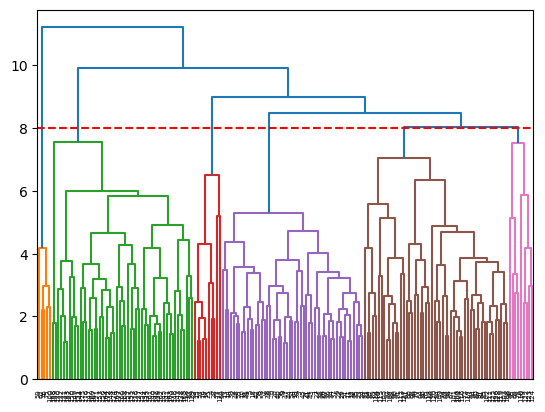

In [48]:
from scipy.cluster import hierarchy

lk = hierarchy.linkage(pcadf,method='complete')
dendrogram = hierarchy.dendrogram(lk)
plt.axhline(y = 8 , c = 'red', linestyle = '--')